In [2]:
import numpy as np
import matplotlib.pyplot as plt

import holodeck as holo
from holodeck import sams
from holodeck import utils, plot
from holodeck.constants import MSOL, YR, GYR
import scipy.constants as sc
import matplotlib as mpl


rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams["font.size"]=15
plt.rcParams["figure.figsize"]=(5,3.5)
plt.rcParams["xtick.direction"]="in"
plt.rcParams["ytick.direction"]="in"
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['legend.handlelength'] = 1.2
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.columnspacing'] = 0.5
plt.rcParams['legend.framealpha'] = 1


In [ ]:
# mass = sc.eV / sc.c**2  * 10**(-14)
# velo = 1e-8 * sc.c

# lc = sc.hbar / mass / velo / sc.parsec
# lcomp = sc.hbar / mass / sc.c  / sc.parsec
# tc = 4*np.pi* sc.hbar / mass / velo**2 / (sc.year*1e6)
# print(lc,lcomp,tc)


In [4]:
def get_hc_ideal( allparams, Nsamps , fgw= 1/sc.year , SAM_SHAPE = (20, 21, 22)  ):

    phi0 , mchar0_log10, alpha0, zbeta, qgamma, time_norm, zbeta1, mu, alpha, scatter_dex = allparams

    if type(phi0) in [float, int]:
        phi0 = [phi0] * Nsamps
    if type(mchar0_log10) in [float, int]:
        mchar0_log10 = [mchar0_log10] * Nsamps
    if type(alpha0) in [float, int]:
        alpha0 = [alpha0] * Nsamps
    if type(zbeta) in [float, int]:
        zbeta = [zbeta]* Nsamps
    if type(qgamma) in [float, int]:
        qgamma = [qgamma]* Nsamps
    if type(time_norm) in [float, int]:
        time_norm = [time_norm]* Nsamps
    if type(zbeta1) in [float, int]:
        zbeta1 = [zbeta1]* Nsamps
    if type(mu) in [float, int]:
        mu = [mu]* Nsamps
    if type(alpha) in [float, int]:
        alpha = [alpha]* Nsamps
    if type(scatter_dex) in [float, int]:
        scatter_dex = [scatter_dex]* Nsamps

    
    all_hc_ideal = np.zeros(Nsamps)
    for i in range(len(phi0)):
        gsmf = holo.sams.GSMF_Schechter(phiz = -0.60 ,mcharz=0.11, alphaz=-0.03, mchar0=None, \
                                    phi0 = phi0[i],mchar0_log10=mchar0_log10[i], alpha0=alpha0[i])

        # GPF
        gpf = holo.sams.GPF_Power_Law(frac_norm_allq=None, frac_norm=0.033, mref=None, mref_log10=11.0, 
                                        malpha=0.0, zbeta=zbeta[i], qgamma=qgamma[i], obs_conv_qlo=0.25, max_frac=1.0)

        # GMT
        gmt = holo.sams.GMT_Power_Law(time_norm = time_norm[i], mref0=1.0e11*MSOL, malpha=0.0\
                                    , zbeta=zbeta1[i], qgamma=0.0 )

        # MMBulge
        mmbulge = holo.host_relations.MMBulge_Standard(mamp_log10=mu[i], mplaw=alpha[i], mref=None, \
                                                    scatter_dex=scatter_dex[i], bulge_frac=None, bulge_mfrac=0.615)

        

        

        sam = holo.sams.Semi_Analytic_Model(gsmf=gsmf, gpf=gpf, gmt=gmt, mmbulge=mmbulge, shape=SAM_SHAPE)
        hc_ideal = sam.gwb_ideal(fgw)

        all_hc_ideal[i] = hc_ideal
        print(i)
        
    return all_hc_ideal, sam



In [ ]:
Nsamps = 50000
hc_ideal_all = []

phi0 = np.random.normal(-2.56,0.4,Nsamps)
mchar0_log10 = np.random.normal(10.9,0.4,Nsamps)
alpha0 = np.random.normal(-1.2,0.2,Nsamps)

zbeta = np.random.normal(0.8,0.4,Nsamps)
qgamma = np.random.normal(0.5,0.3,Nsamps)

time_norm = ( np.random.rand(Nsamps) * 4.8 + 0.2 ) * GYR
zbeta1 = np.random.rand(Nsamps) * 2 - 2

mu = np.random.normal(8.6,0.2,Nsamps)
alpha = np.random.normal(1.2,0.2,Nsamps)
scatter_dex = np.random.normal(0.32,0.15,Nsamps*5); scatter_dex=scatter_dex[scatter_dex>0.01][:Nsamps] ;

all_hc_ideal = get_hc_ideal( [phi0 , mchar0_log10, alpha0, zbeta, qgamma, time_norm, zbeta1, mu, alpha, scatter_dex] ,Nsamps)
#all_hc_ideal = get_hc_ideal( [phi0 , mchar0_log10, -1.21, 1, 0, 0.5*GYR, -0.5, mu, 1.10, scatter_dex] ,Nsamps)
all_hc_ideal = all_hc_ideal[0]

np.save("all_hc_ideal.npy", all_hc_ideal)

UndefVarError: UndefVarError: `np` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
all_hc_ideal = np.load("all_hc_ideal.npy")

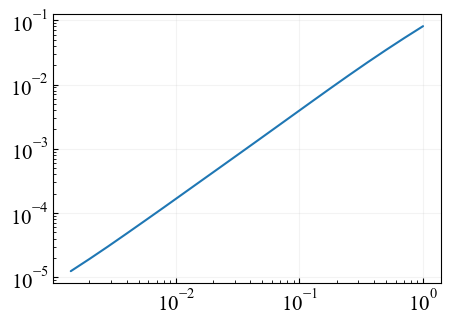

In [70]:
# plt.figure()
# plt.loglog(sam.redz[1:],dist[1,1,:])
# plt.figure()
# dist = Ntot_per_bin/np.diff(np.log(sam.mtot))[:,None,None]/np.diff(np.log(sam.mrat))[None,:,None]/np.diff(np.log(sam.redz))[None,None,:]
plt.loglog( sam.mrat[1:] , np.sum( Ntot_per_bin ,axis=(0,2))/np.diff(np.log(sam.mrat) ))

In [ ]:
nden1 = np.sum(nden[1:,:,:] * np.diff( np.log10(sam.mtot) )[:,None,None] ,axis=0 )
nden2 = np.sum(nden1[:,1:] * np.diff( sam.redz )[None,:] ,axis=1 )

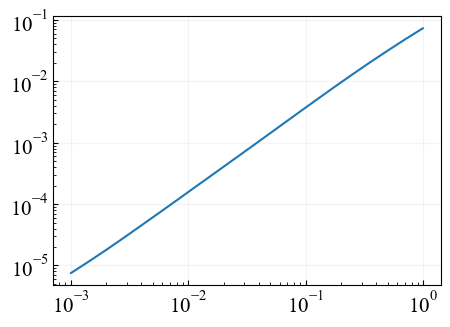

In [ ]:
plt.loglog( sam.mrat, nden2 * sam.mrat )

In [5]:
SAM_SHAPE = (40,21,22)
#hc_ideal_fiducial,sam = get_hc_ideal( [-2.15 , 11.27, -1.21, 1, 0.5, 0.5*GYR, -0.5, 8.68, 1.1, 0.325],1 ,SAM_SHAPE=SAM_SHAPE)
hc_ideal_fiducial,sam = get_hc_ideal( [-2.27 , 11.14, -1.21, 1, 0.5, 0.5*GYR, -0.5, 8.65, 1.1, 0.319],1 ,SAM_SHAPE=SAM_SHAPE)
nden = sam.static_binary_density  # this will trigger the variable to be calculated and cached.
### Integrate over log10M, q, z to get Number in each log10M, q, z bin
edges = [sam.mtot, sam.mrat, sam.redz]
Ntot_per_bin = holo.utils._integrate_grid_differential_number(edges, nden, freq=False)


### construct centered values
# (0, 1, 2)
# (M, Q, Z)
Nm = SAM_SHAPE[0]
mcent = np.zeros(Nm-1)
for i in range(Nm-1):
	mcent[i] = (sam.mtot[i]+sam.mtot[i+1])/2./MSOL

Nq = SAM_SHAPE[1]
qcent = np.zeros(Nq-1)
for i in range(Nq-1):
	qcent[i] = (sam.mrat[i]+sam.mrat[i+1])/2.


Nz = SAM_SHAPE[2]
zcent = np.zeros(Nz-1)
for i in range(Nz-1):
	zcent[i] = (sam.redz[i]+sam.redz[i+1])/2.

nden_bh = Ntot_per_bin / np.diff(np.log10(sam.mtot))[:,None,None] / np.diff(sam.mrat)[None,:,None] / np.diff(sam.redz)[None,None,:]
edges_bh = np.array([ mcent , qcent , zcent ],dtype='object')
np.save("nden_M%i_Q%i_Z%i_holov1p6_SAM_NANO15Astro.npy" %(SAM_SHAPE[0], SAM_SHAPE[1], SAM_SHAPE[2]), nden_bh)
np.save("edges_M%i_Q%i_Z%i_holov1p6_SAM_NANO15Astro.npy" %(SAM_SHAPE[0], SAM_SHAPE[1], SAM_SHAPE[2]), edges_bh, allow_pickle=True)
print(2*np.log10( hc_ideal_fiducial) )

17:34:17 WARNING : Parameter ``bulge_mfrac`` is deprecated!  Please use ``bulge_frac`` instead! [host_relations.py:__init__]
17:34:17 INFO : Galaxy pair-fraction provided, using galaxy pair-fraction and merger-time. [sam.py:__init__]
<holodeck.sams.sam.Semi_Analytic_Model object at 0x11c363040> :: utils.stats(rz)='-1.00e+00, -1.00e+00, -1.00e+00, 6.44e-02, 2.44e+00, 5.55e+00, 8.17e+00'
17:34:17 INFO : Adding MMbulge scatter (3.1900e-01) [sam.py:static_binary_density]
17:34:17 INFO : 	dens bef: (0.00e+00, 3.19e-245, 1.19e-46, 2.40e-04, 8.83e-03, 2.34e-02, 8.09e-02) [sam.py:static_binary_density]
17:34:17 INFO : Scatter added after 0.396873 sec [sam.py:static_binary_density]
17:34:17 INFO : 	dens aft: (2.17e-30, 1.42e-13, 1.34e-09, 4.89e-04, 9.72e-03, 2.44e-02, 6.74e-02) [sam.py:static_binary_density]
17:34:17 INFO : 	mass: 8.28e-02 ==> 8.31e-02 || change = 3.7391e-03 [sam.py:static_binary_density]
17:34:17 INFO : zeroing out 7.56e+03/1.85e+04 = 4.09e-01 bins stalled from GMT [sam.py:sta

Fitted mu: -30.603443620554465, Fitted sigma: 1.0889664344665084


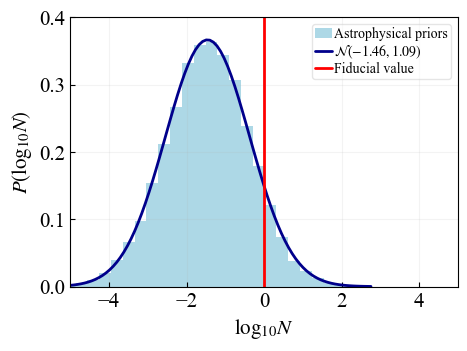

In [ ]:
from scipy.stats import norm

# Fit a Gaussian to the histogram data
(mu, sigma) = norm.fit(2*np.log10(all_hc_ideal))

#all_hc_ideal = all_hc_ideal[0]
h = plt.hist(2*np.log10(all_hc_ideal ) -2*np.log10(hc_ideal_fiducial) ,label="Astrophysical priors",bins=30,density=True,color='lightblue')

plt.ylim(0,h[0].max()*1.1)
plt.xlabel(r"$\log_{10}(h_c^2(f_{\rm yr}))$")

# Plot the Gaussian fit
x = np.linspace(min(2*np.log10(all_hc_ideal)) , max(2*np.log10(all_hc_ideal)), 100)
p = norm.pdf(x, mu, sigma)
# plt.plot(x, p, 'k', linewidth=2, label=f'Gaussian fit ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)')
plt.plot(x-2*np.log10(hc_ideal_fiducial), p, 'k', linewidth=2, label=r'$\mathcal{N}(%.2f,%.2f)$'%(mu-2*np.log10(hc_ideal_fiducial),sigma)\
         ,color='darkblue' )
print(f"Fitted mu: {mu}, Fitted sigma: {sigma}")
# Update the y-label
plt.ylabel(r"$P(\log_{10}N)$")


# plt.plot( [2*np.log10(2.4e-15)-2*np.log10(hc_ideal_fiducial),2*np.log10(2.4e-15)-2*np.log10(hc_ideal_fiducial)],[0,h[0].max()*1.1] ,\
#          label="$h_c(f)\propto f^{-2/3}$ fit")
plt.plot( [2*np.log10(hc_ideal_fiducial)-2*np.log10(hc_ideal_fiducial),\
           2*np.log10(hc_ideal_fiducial)-2*np.log10(hc_ideal_fiducial)],[0,h[0].max()*1.1] ,label="Fiducial value",color='red',lw=2)
plt.legend(fontsize=10,loc=1,framealpha=0.5)

plt.xlabel(r"$\log_{10}N$")

plt.xlim(-5,5)

plt.savefig("hc_ideal_prior.pdf",bbox_inches='tight')